##### Kristie Kooken 
##### Project 2, Diabetes


For my final project, I am interested to better understand if certain characteristics can predict whether or not a woman might develop diabetes. I have a close friend who became diabetic during her pregnancy and now, she and her child both have diabetes. It made me wonder if it would have been possible to predict diabetes based on certain factors, such as glucose levels. Once factors are established, it would be possible to then look into interventions by understanding if changes in the predicator variables can influence the outcome. 

When considering what could have an impact on my research question, I think that glucose levels, amount of exercise and heredity (having a parent or grandparent who had diabetes) can change course for whether an individual can become diabetic. While there are many factors that can influence becoming a diabetic, my grandmother had diabetes in her old age and these were factors that greatly influenced her outcomes (and likely mine as well). Diabetes is a very serious health condition and important area of medical research to help the population of people who become diabetic whether born with diabetes or become diabetic in older age. 

In order to investigate the factors that influence diabetes, I began to explore different data sources available to me from the internet. 

Data Source: Earlier in the term, I reviewed kaggle.com site to explore the available data sources for this project. As I am learning both coding in Python and statistical methods, I wanted to have a dataset that was not as complex or complicated as some of the government data site. For example, I explored using hospital emergency visit survey data but found the data to be very complex and wanted to be able to manage my understanding of the process so settled on a data source that is a subset of a very large dataset from National Institute of Diabetes and Digestive and Kidney Diseases. This larger dataset was decreased to in order to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. This dataset focuses on females who are at least 21 years old and of Pima Indian heritage (American Indian) from Arizona. 

The dataset was downloaded at this location: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset from kaggle.com. The dataset is a .csv file and has nine variables. 

Description of variables: 
* Pregnancies (number of pregnancies)
* Glucose (glucose level in blood)
* BloodPressure (Diastolic blood pressure in mm Hg)
* SkinThickness (Triceps skin fold thickness in mm)
* Insulin (2-Hour serum insulin in mu U/m)
* BMI (body mass index)
* DiabetesPedigreeFunction (this provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher pedigree function means patient is more likely to have diabetes)
* Age (age in years)
* Diabetes_YN (has diabetes or not where 1 is Yes and 0 is No)

Unbeknownst to me at the time, the dataset that I picked is a popular dataset to practice data science techniques on and there are a few projects and postings. Luckily, none of the analyses that I came across are the same as requested in this project. Likewise, this data seems to have an issue with zero being used for missing values. For example, in Blood Pressure, there is no measurement of zero in a person who is alive. The following variables have zeros where it appears to be used as a replacement for missing values - BMI, Insulin, Glucose, BloodPressure, SkinThickness. 

In [426]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")


In [427]:
import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

In [428]:
download("https://raw.githubusercontent.com/spk334/530_Final_Project/main/diabetes.csv")

##### Reading in the data 

In [429]:
diab = pd.read_csv("diabetes.csv", parse_dates=[5])
diab.head()



SUBJID  Pregnancies  Glucose  BloodPressure  SkinThickness Insulin    BMI  \
0       1            6      148             72             35       0 33.600   
1       2            1       85             66             29       0 26.600   
2       3            8      183             64              0       0 23.300   
3       4            1       89             66             23      94 28.100   
4       5            0      137             40             35     168 43.100   

   DiabetesPedigreeFunction  Age  Diabetes_YN  
0                     0.627   50            1  
1                     0.351   31            0  
2                     0.672   32            1  
3                     0.167   21            0  
4                     2.288   33            1

###### Generating histograms of each variable 

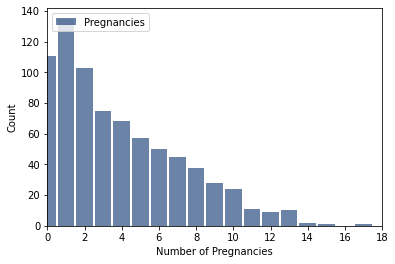

In [430]:
Pregnancies = np.floor(diab.Pregnancies)


hist = thinkstats2.Hist(diab.Pregnancies, label='Pregnancies')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Pregnancies', ylabel='Count', xlim=[0, 18.0])

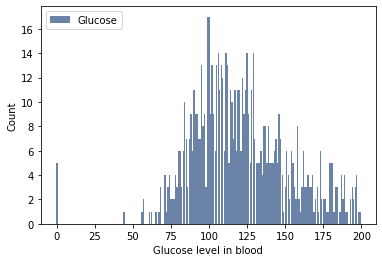

In [431]:
Glucose = np.floor(diab.Glucose)


hist = thinkstats2.Hist(diab.Glucose, label='Glucose')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Glucose level in blood', ylabel='Count') 

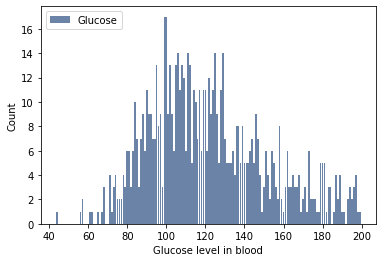

In [432]:
### taking out the zeros version of the histograms - assuming this is dirty data 
nozerogl = diab[diab.Glucose != 0]

Glucose = np.floor(nozerogl.Glucose)


hist = thinkstats2.Hist(nozerogl.Glucose, label='Glucose')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Glucose level in blood', ylabel='Count') 

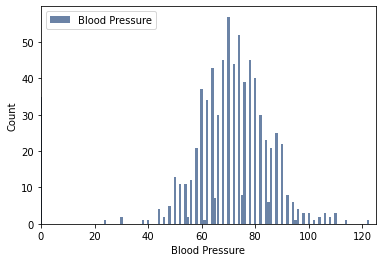

In [433]:
BloodPressure = np.floor(diab.BloodPressure)


hist = thinkstats2.Hist(diab.BloodPressure, label='Blood Pressure')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Blood Pressure', ylabel='Count', xlim=[0, 125.0]) 

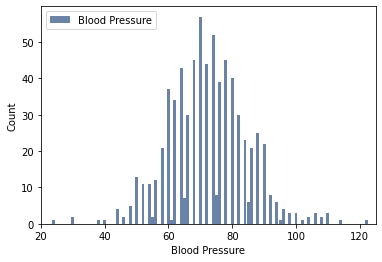

In [434]:
### taking out the zeros version of the histograms - assuming this is dirty data 
nozerobp = diab[diab.BloodPressure != 0]

#nozerobp.head()

BloodPressure = np.floor(nozerobp.BloodPressure)


hist = thinkstats2.Hist(nozerobp.BloodPressure, label='Blood Pressure')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Blood Pressure', ylabel='Count', xlim=[20, 125.0] ) 


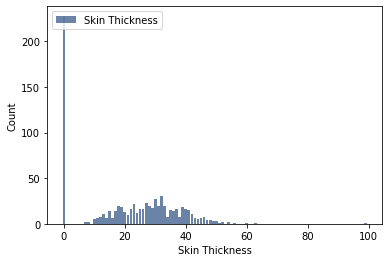

In [435]:
SkinThickness = np.floor(diab.SkinThickness)


hist = thinkstats2.Hist(diab.SkinThickness, label='Skin Thickness')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Skin Thickness', ylabel='Count') 


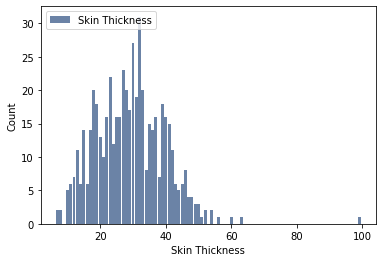

In [436]:
nozerosk= diab[diab.SkinThickness != 0]

SkinThickness = np.floor(nozerosk.SkinThickness)


hist = thinkstats2.Hist(nozerosk.SkinThickness, label='Skin Thickness')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Skin Thickness', ylabel='Count') 

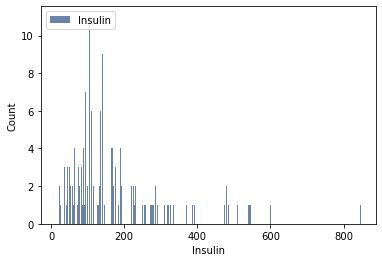

In [437]:
# Insulin plot

nozeroin = diab[diab.Insulin.astype(float) != 0]

Insulin = np.floor(nozeroin.Insulin.astype(float))

hist = thinkstats2.Hist(nozeroin.Insulin.astype(float), label='Insulin')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Insulin', ylabel='Count',labelpad=None) 

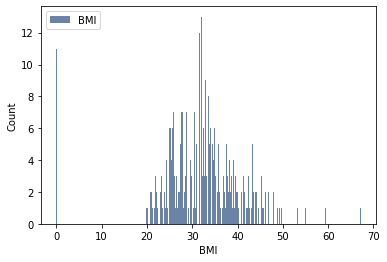

In [438]:
# BMI plot
BMI = np.floor(diab.BMI)


hist = thinkstats2.Hist(diab.BMI, label='BMI')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='BMI', ylabel='Count',labelpad=None) 

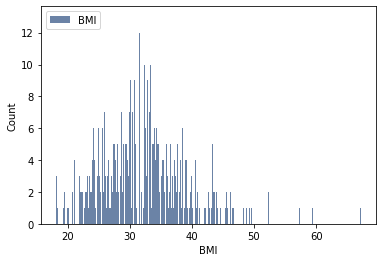

In [439]:
nozerobmi= diab[diab.BMI != 0]

BMI = np.floor(nozerobmi.BMI)


hist = thinkstats2.Hist(nozerobmi.BMI, label='BMI')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='BMI', ylabel='Count') 

Text(0.5, 1.0, 'Diabetes Pedigree Distribution')

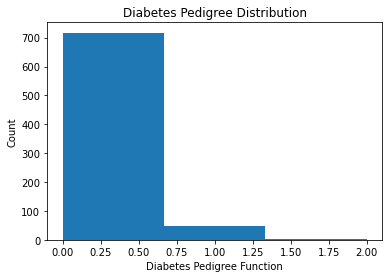

In [440]:
# DiabetesPedigreeFunction, switch ways to generate because the class way was not displaying correctly with decimals
# This is an important variable so I wanted to be able to see it

diab.DiabetesPedigreeFunction = np.floor(diab.DiabetesPedigreeFunction)

plt.hist(diab['DiabetesPedigreeFunction'], bins=3)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Count')
plt.title('Diabetes Pedigree Distribution')

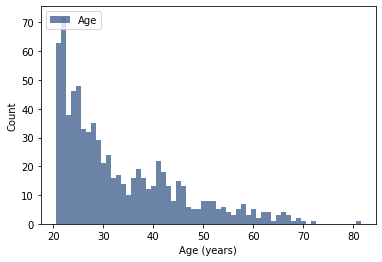

In [441]:
# Age

diab.Age = np.floor(diab.Age)


hist = thinkstats2.Hist(diab.Age, label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age (years)', ylabel='Count') 

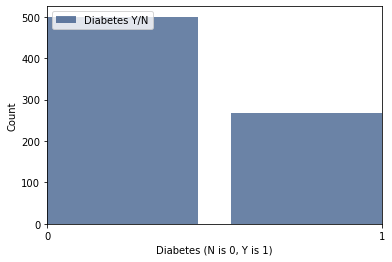

In [442]:
# Diabetes_YN - we know it will just be two bars but interested to see the distribution of yes to no
# No is first for this output 

diab.Diabetes_YN = np.floor(diab.Diabetes_YN)


hist = thinkstats2.Hist(diab.Diabetes_YN, label='Diabetes Y/N')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Diabetes (N is 0, Y is 1)', ylabel='Count', xlim=[0, 1], xticks=[0,1]) 

###### Descriptive stats section for each variable that is continuous 

In [443]:
from scipy import stats

def desc_stat (var):
    med = var.median()
    mode = stats.mode(var)
    nmod = str(mode[0]).lstrip('[').rstrip(']')
    
    print("Median      ", med)
    print("Mode        ", nmod)


In [444]:
# all with all outliers (or data issues) present 
print(diab.describe())

       SUBJID  Pregnancies  Glucose  BloodPressure  SkinThickness     BMI  \
count 768.000      768.000  768.000        768.000        768.000 768.000   
mean  384.500        3.845  120.895         69.105         20.536  31.993   
std   221.847        3.370   31.973         19.356         15.952   7.884   
min     1.000        0.000    0.000          0.000          0.000   0.000   
25%   192.750        1.000   99.000         62.000          0.000  27.300   
50%   384.500        3.000  117.000         72.000         23.000  32.000   
75%   576.250        6.000  140.250         80.000         32.000  36.600   
max   768.000       17.000  199.000        122.000         99.000  67.100   

       DiabetesPedigreeFunction     Age  Diabetes_YN  
count                   768.000 768.000      768.000  
mean                      0.072  33.241        0.349  
std                       0.277  11.760        0.477  
min                       0.000  21.000        0.000  
25%                       0.000

In [445]:
# only pregnancy - all data is here 
print(diab.Pregnancies.describe())
desc_stat(diab.Pregnancies)

count   768.000
mean      3.845
std       3.370
min       0.000
25%       1.000
50%       3.000
75%       6.000
max      17.000
Name: Pregnancies, dtype: float64
Median       3.0
Mode         1


In [446]:
#find frequency of each variable

pd.crosstab(index=diab['Pregnancies'], columns='count')

col_0        count
Pregnancies       
0              111
1              135
2              103
3               75
4               68
5               57
6               50
7               45
8               38
9               28
10              24
11              11
12               9
13              10
14               2
15               1
17               1

In [447]:
# Glucose with no zero values - cannot have a zero score in glucose

print(nozerogl.Glucose.describe())
desc_stat(nozerogl.Glucose)

count   763.000
mean    121.687
std      30.536
min      44.000
25%      99.000
50%     117.000
75%     141.000
max     199.000
Name: Glucose, dtype: float64
Median       117.0
Mode         99


In [448]:
#find frequency of each variable

pd.crosstab(index=diab['Glucose'], columns='count')

col_0    count
Glucose       
0            5
44           1
56           1
57           2
61           1
...        ...
195          2
196          3
197          4
198          1
199          1

[136 rows x 1 columns]

In [449]:
# blood pressure with no zero 

print(nozerobp.BloodPressure.describe())
desc_stat(nozerobp.BloodPressure)

count   733.000
mean     72.405
std      12.382
min      24.000
25%      64.000
50%      72.000
75%      80.000
max     122.000
Name: BloodPressure, dtype: float64
Median       72.0
Mode         70


In [450]:
#find frequency of each variable

pd.crosstab(index=diab['BloodPressure'], columns='count')

col_0          count
BloodPressure       
0                 35
24                 1
30                 2
38                 1
40                 1
44                 4
46                 2
48                 5
50                13
52                11
54                11
55                 2
56                12
58                21
60                37
61                 1
62                34
64                43
65                 7
66                30
68                45
70                57
72                44
74                52
75                 8
76                39
78                45
80                40
82                30
84                23
85                 6
86                21
88                25
90                22
92                 8
94                 6
95                 1
96                 4
98                 3
100                3
102                1
104                2
106                3
108                2
110                3
114                1
122                1

In [451]:
#SkinThickness

print(nozerosk.SkinThickness.describe())
desc_stat(nozerosk.SkinThickness)

count   541.000
mean     29.153
std      10.477
min       7.000
25%      22.000
50%      29.000
75%      36.000
max      99.000
Name: SkinThickness, dtype: float64
Median       29.0
Mode         32


In [452]:
#find frequency of each variable

pd.crosstab(index=diab['SkinThickness'], columns='count')

col_0          count
SkinThickness       
0                227
7                  2
8                  2
10                 5
11                 6
12                 7
13                11
14                 6
15                14
16                 6
17                14
18                20
19                18
20                13
21                10
22                16
23                22
24                12
25                16
26                16
27                23
28                20
29                17
30                27
31                19
32                31
33                20
34                 8
35                15
36                14
37                16
38                 7
39                18
40                16
41                15
42                11
43                 6
44                 5
45                 6
46                 8
47                 4
48                 4
49                 3
50                 3
51                 1
52                 2
54                 2
56                 1
60                 1
63                 1
99                 1

Based on investigation, skin thickness cannot have a value of 0 thus these will be assumed to be errors in the dataset. 

In [453]:
#Insulin

print(nozeroin.Insulin.astype(float).describe())
desc_stat(nozeroin.Insulin.astype(float))

count   394.000
mean    155.548
std     118.776
min      14.000
25%      76.250
50%     125.000
75%     190.000
max     846.000
Name: Insulin, dtype: float64
Median       125.0
Mode         105.


In [454]:
#find frequency of each variable

pd.crosstab(index=diab['Insulin'].astype(float), columns='count')

col_0    count
Insulin       
0.000      374
14.000       1
15.000       1
16.000       1
18.000       2
...        ...
579.000      1
600.000      1
680.000      1
744.000      1
846.000      1

[186 rows x 1 columns]

In [455]:
#BMI

print(nozerobmi.BMI.describe())
desc_stat(nozerobmi.BMI)

count   757.000
mean     32.457
std       6.925
min      18.200
25%      27.500
50%      32.300
75%      36.600
max      67.100
Name: BMI, dtype: float64
Median       32.3
Mode         32.


In [456]:
#find frequency of each variable

pd.crosstab(index=diab['BMI'], columns='count')

col_0   count
BMI          
0.000      11
18.200      3
18.400      1
19.100      1
19.300      1
...       ...
53.200      1
55.000      1
57.300      1
59.400      1
67.100      1

[248 rows x 1 columns]

In [457]:
#DiabetesPedigreeFunction

print(diab.DiabetesPedigreeFunction.astype(float).describe())
desc_stat(diab.DiabetesPedigreeFunction.astype(float))

count   768.000
mean      0.072
std       0.277
min       0.000
25%       0.000
50%       0.000
75%       0.000
max       2.000
Name: DiabetesPedigreeFunction, dtype: float64
Median       0.0
Mode         0.


In [458]:
#find frequency of each variable
# I did this a few different ways and get this same display 

pd.options.display.float_format = '{:.3f}'.format
pd.crosstab(index=diab['DiabetesPedigreeFunction'].astype(float), columns='count')

col_0                     count
DiabetesPedigreeFunction       
0.000                       717
1.000                        47
2.000                         4

In [459]:
#Age
print(diab.Age.astype(float).describe())
desc_stat(diab.Age.astype(float))

count   768.000
mean     33.241
std      11.760
min      21.000
25%      24.000
50%      29.000
75%      41.000
max      81.000
Name: Age, dtype: float64
Median       29.0
Mode         22.


In [460]:
#find frequency of each variable

pd.crosstab(index=diab['Age'].astype(float), columns='count')

col_0   count
Age          
21.000     63
22.000     72
23.000     38
24.000     46
25.000     48
26.000     33
27.000     32
28.000     35
29.000     29
30.000     21
31.000     24
32.000     16
33.000     17
34.000     14
35.000     10
36.000     16
37.000     19
38.000     16
39.000     12
40.000     13
41.000     22
42.000     18
43.000     13
44.000      8
45.000     15
46.000     13
47.000      6
48.000      5
49.000      5
50.000      8
51.000      8
52.000      8
53.000      5
54.000      6
55.000      4
56.000      3
57.000      5
58.000      7
59.000      3
60.000      5
61.000      2
62.000      4
63.000      4
64.000      1
65.000      3
66.000      4
67.000      3
68.000      1
69.000      2
70.000      1
72.000      1
81.000      1

##### Comparing two scenarios in the data using a PMF, for this section, I will use Diabetes Pedigree Function, Pregnancies, Glucose, BMI and BloodPressure. The data is divided by those who have diabetes and those who do not. 

In [461]:
# Diabetes Pedigree Function

nodiabetes = diab[diab.Diabetes_YN == 0 ]

DiabetesPedigreeFunction = np.floor(nodiabetes.DiabetesPedigreeFunction.astype(float))

yesdiabetes = diab[diab.Diabetes_YN == 1]
DiabetesPedigreeFunction = np.floor(yesdiabetes.DiabetesPedigreeFunction.astype(float))

In [462]:
first_hist = thinkstats2.Hist(nodiabetes.DiabetesPedigreeFunction.astype(float))

sec_hist = thinkstats2.Hist(yesdiabetes.DiabetesPedigreeFunction.astype(float))

In [463]:
print(first_hist)
print(sec_hist)

Hist({0.0: 478, 1.0: 21, 2.0: 1})
Hist({0.0: 239, 1.0: 26, 2.0: 3})


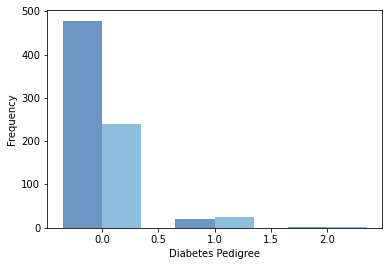

<Figure size 576x432 with 0 Axes>

In [464]:
width=0.35
thinkplot.PrePlot(2)

thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(sec_hist, align='left', width=width)
thinkplot.Show(xlabel = "Diabetes Pedigree", ylabel= "Frequency")

In [465]:
# distribution for Diabetes Pedigree Function
pmf1 = thinkstats2.Pmf(nodiabetes.DiabetesPedigreeFunction, label="No Diabetes")
pmf2 = thinkstats2.Pmf(yesdiabetes.DiabetesPedigreeFunction, label="Yes Diabetes")

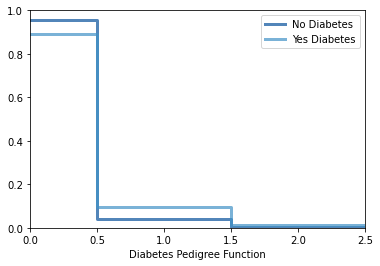

In [466]:
width = 0.35
axis = [0, 2.5, 0, 1.0]

thinkplot.PrePlot(2)

thinkplot.Pmfs([pmf1, pmf2])
thinkplot.Config(xlabel="Diabetes Pedigree Function", axis=axis)

In [467]:
# Pregnancies

nodiabetes = diab[diab.Diabetes_YN == 0 ]

Pregnancies = np.floor(nodiabetes.Pregnancies.astype(float))

yesdiabetes = diab[diab.Diabetes_YN == 1]
Pregnancies = np.floor(yesdiabetes.Pregnancies.astype(float))

In [468]:
first_hist = thinkstats2.Hist(nodiabetes.Pregnancies.astype(float))

sec_hist = thinkstats2.Hist(yesdiabetes.Pregnancies.astype(float))

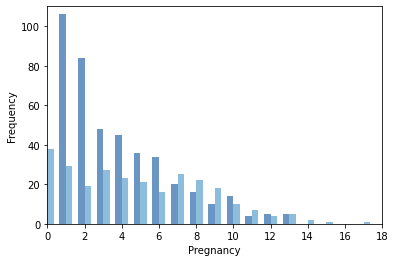

<Figure size 576x432 with 0 Axes>

In [469]:
width=0.35
axis = [0, 18, 0, 110]
thinkplot.PrePlot(2)

thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(sec_hist, align='left', width=width)
thinkplot.Show(xlabel = "Pregnancy", ylabel= "Frequency", axis=axis)

In [470]:
# distribution for Pregnancies
pmf1 = thinkstats2.Pmf(nodiabetes.Pregnancies, label="No Diabetes")
pmf2 = thinkstats2.Pmf(yesdiabetes.Pregnancies, label="Yes Diabetes")

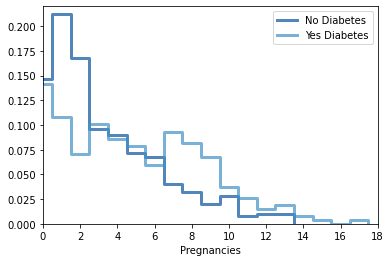

In [471]:
width = 0.35
width=0.35
axis = [0, 18, 0, .22]

thinkplot.PrePlot(2)

thinkplot.Pmfs([pmf1, pmf2])
thinkplot.Config(xlabel="Pregnancies", axis=axis)

In [472]:
# Glucose

nodiabetes = nozerogl[nozerogl.Diabetes_YN == 0 ]
Glucose = np.floor(nodiabetes.Glucose.astype(float))

yesdiabetes = nozerogl[nozerogl.Diabetes_YN == 1]
Glucose = np.floor(yesdiabetes.Glucose.astype(float))

In [473]:
first_hist = thinkstats2.Hist(nodiabetes.Glucose.astype(float))

sec_hist = thinkstats2.Hist(yesdiabetes.Glucose.astype(float))

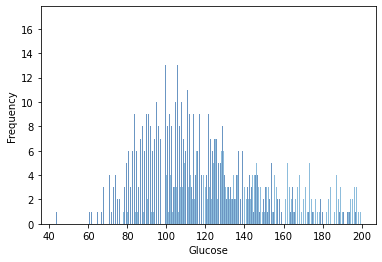

<Figure size 576x432 with 0 Axes>

In [474]:
width=0.45

thinkplot.PrePlot(2)

thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(sec_hist, align='left', width=width)
thinkplot.Show(xlabel = "Glucose", ylabel= "Frequency")

In [475]:
# distribution for Glucose
pmf1 = thinkstats2.Pmf(nodiabetes.Glucose, label="No Diabetes")
pmf2 = thinkstats2.Pmf(yesdiabetes.Glucose, label="Yes Diabetes")

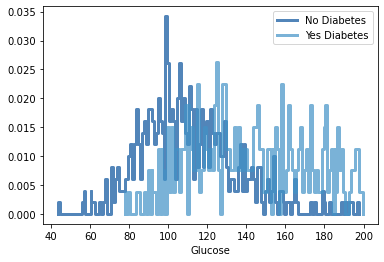

In [476]:
width = 0.30

thinkplot.PrePlot(2)

thinkplot.Pmfs([pmf1, pmf2])
thinkplot.Config(xlabel="Glucose")

In [477]:
# BMI

nodiabetes = nozerobmi[nozerobmi.Diabetes_YN == 0 ]
BMI = np.floor(nodiabetes.BMI.astype(float))

yesdiabetes = nozerobmi[nozerobmi.Diabetes_YN == 1]
BMI = np.floor(yesdiabetes.BMI.astype(float))

In [478]:
first_hist = thinkstats2.Hist(nodiabetes.BMI.astype(float))

sec_hist = thinkstats2.Hist(yesdiabetes.BMI.astype(float))

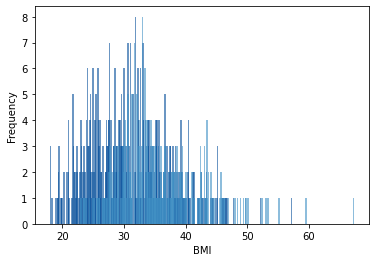

<Figure size 576x432 with 0 Axes>

In [479]:
width=0.25

thinkplot.PrePlot(2)

thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(sec_hist, align='left', width=width)
thinkplot.Show(xlabel = "BMI", ylabel= "Frequency")

In [480]:
# distribution for BMI
pmf1 = thinkstats2.Pmf(nodiabetes.BMI, label="No Diabetes")
pmf2 = thinkstats2.Pmf(yesdiabetes.BMI, label="Yes Diabetes")

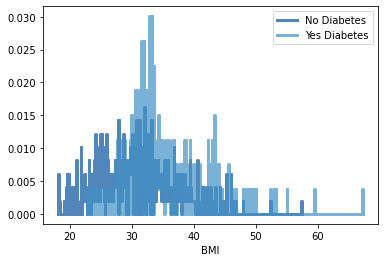

In [481]:
width = 0.30

thinkplot.PrePlot(2)

thinkplot.Pmfs([pmf1, pmf2])
thinkplot.Config(xlabel="BMI")

In [482]:
# BloodPressure
nodiabetes = nozerobp[nozerobp.Diabetes_YN == 0 ]
BloodPressure = np.floor(nodiabetes.BloodPressure.astype(float))

yesdiabetes = nozerobp[nozerobp.Diabetes_YN == 1]
BloodPressure = np.floor(yesdiabetes.BloodPressure.astype(float))


In [483]:
first_hist = thinkstats2.Hist(nodiabetes.BloodPressure.astype(float))

sec_hist = thinkstats2.Hist(yesdiabetes.BloodPressure.astype(float))

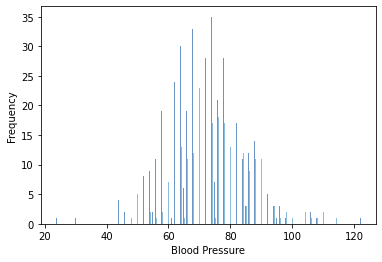

<Figure size 576x432 with 0 Axes>

In [484]:
width=0.25

thinkplot.PrePlot(2)

thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(sec_hist, align='left', width=width)
thinkplot.Show(xlabel = "Blood Pressure", ylabel= "Frequency")

In [485]:
# distribution for BloodPressure
pmf1 = thinkstats2.Pmf(nodiabetes.BloodPressure, label="No Diabetes")
pmf2 = thinkstats2.Pmf(yesdiabetes.BloodPressure, label="Yes Diabetes")

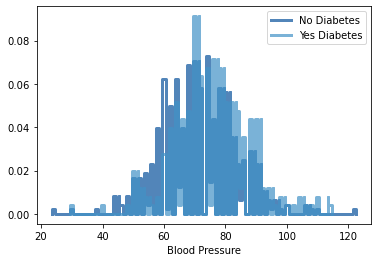

In [486]:
width = .25
thinkplot.PrePlot(2)

thinkplot.Pmfs([pmf1, pmf2])
thinkplot.Config(xlabel="Blood Pressure")

##### Creating a cumulative distribution function for those who have diabetes vs those who do not for glucose levels in order to compare the distributions between the two. 

In [487]:
nodiabetes = nozerogl[nozerogl.Diabetes_YN == 0 ]
Glucose = np.floor(nodiabetes.Glucose.astype(float))

yesdiabetes = nozerogl[nozerogl.Diabetes_YN == 1]
Glucose = np.floor(yesdiabetes.Glucose.astype(float))



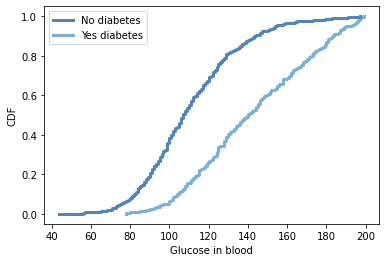

In [488]:
cdf1 = thinkstats2.Cdf(nodiabetes.Glucose, label='No diabetes')
cdf2 = thinkstats2.Cdf(yesdiabetes.Glucose, label='Yes diabetes')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf1, cdf2])
thinkplot.Config(xlabel='Glucose in blood', ylabel='CDF')

Answering what does the CDF function tell you and how does it address the question I am answering? 

The CDF is the function that maps from a value to its percentile rank and one of the features of this function is where x is any value that might appear in the distribution. It can show the fraction of values in the distribution less than or equal to any given x. From the PDF analyses, I was able to ascertain how similar the distributions between those who have diabetes and those who do not on key variables. Though one can detect similarities or differences using PDF, it is ambigious. However, with CDF, the difference between the glucose levels for diabetic and non-diabetic is very apparent. 

For those who are not diabetic, about 50% have a glucose level of 100 in contrast to those who have diabetes who have a glucose level of about 140. Likewise, those who are diabetic start out with their glucose levels 40 points higher than those are not diabetic. Based on review of the CDF, I would assume that glucose level was a stronger predictor diabetes. 

###### Creating an analytical distribution for glucose 

In [489]:
# starting with a CDF of glucose

df = nozerogl
allglucose = df.Glucose

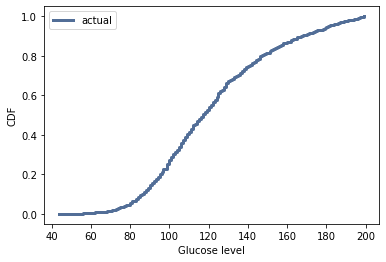

In [490]:
cdf = thinkstats2.Cdf(allglucose, label="actual")

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Glucose level", ylabel="CDF")

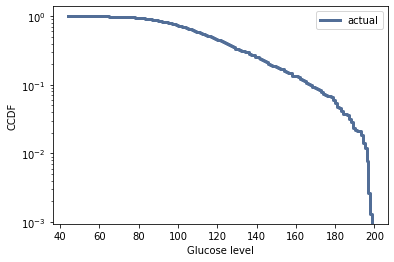

In [491]:
# creating a complementary CDF 

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="Glucose level",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

In [492]:
# creating a normal distribution - the observed CDF and the model
# The model fits the data okay - there are some difference throughout
gluc = nozerogl.Glucose.dropna()

Mean, Var 121.5807743658211 856.2221136860719
Sigma 29.26127327520236


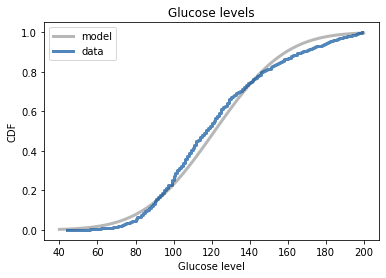

In [493]:
mu, var = thinkstats2.TrimmedMeanVar(gluc, p=0.01)
print("Mean, Var", mu, var)

# plot the model
sigma = np.sqrt(var)
print("Sigma", sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=40, high=200)

thinkplot.Plot(xs, ps, label="model", color="0.6")

# plot the data
cdf = thinkstats2.Cdf(gluc, label="data")

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(title="Glucose levels", xlabel="Glucose level", ylabel="CDF", loc="upper left")

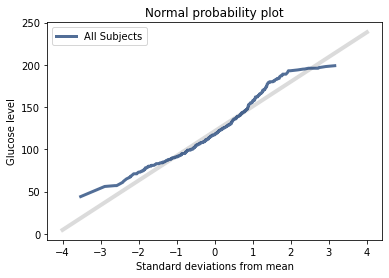

In [494]:
# normal probability plot (a visual test for normality)

mean, var = thinkstats2.TrimmedMeanVar(gluc, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(gluc)
thinkplot.Plot(xs, ys, label="All Subjects")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Glucose level",
)


Perhaps the differences at the top and bottom of the line are due to diabetics versus not in the same population so I will check not being diabetic against the full population  

In [495]:
# creating variable to do this 
yesdiab = nozerogl[nozerogl.Diabetes_YN == 1]
yesd_gluc = yesdiab.Glucose.dropna()

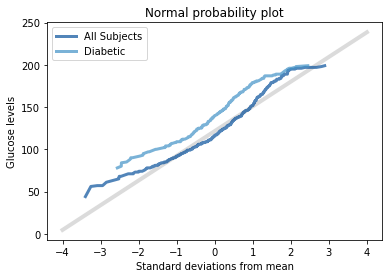

In [496]:
mean, var = thinkstats2.TrimmedMeanVar(gluc, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

thinkplot.PrePlot(2)
xs, ys = thinkstats2.NormalProbability(gluc)
thinkplot.Plot(xs, ys, label="All Subjects")

xs, ys = thinkstats2.NormalProbability(yesd_gluc)
thinkplot.Plot(xs, ys, label="Diabetic")
thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Glucose levels",
)

In [497]:
# lognormal to see if this would fit the data better 

def MakeNormalModel(var1):
    """Plots a CDF with a Normal model.
    """
    cdf = thinkstats2.Cdf(var1, label="Glucose")

    mean, var = thinkstats2.TrimmedMeanVar(var1)
    std = np.sqrt(var)
    print("n, mean, std", len(var1), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

n, mean, std 763 121.5807743658211 29.26127327520236


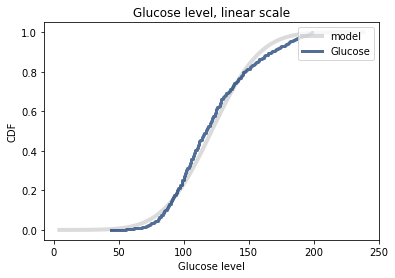

In [498]:
# this is the distribution of glucose level and a normal model, which is not a very good fit.
MakeNormalModel(gluc)
thinkplot.Config(
    title="Glucose level, linear scale",
    xlabel="Glucose level",
    ylabel="CDF",
    loc="upper right",
)

n, mean, std 763 2.072583996558442 0.1030625885526359


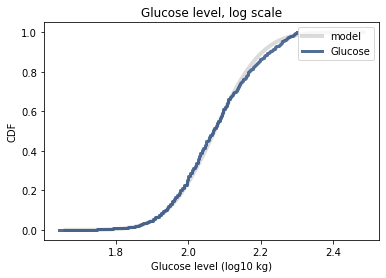

In [499]:
# the distribution of glucose level and a lognormal model, plotted on a log-x scale which looks a lot better

log_gluc = np.log10(gluc)
MakeNormalModel(log_gluc)
thinkplot.Config(
    title="Glucose level, log scale",
    xlabel="Glucose level (log10 kg)",
    ylabel="CDF",
    loc="upper right",
)

In [500]:
def MakeNormalPlot(var2):
    """Generates a normal probability plot.
    """
    mean, var = thinkstats2.TrimmedMeanVar(var2, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color="0.8", label="model")

    xs, ys = thinkstats2.NormalProbability(var2)
    thinkplot.Plot(xs, ys, label="Glucose")

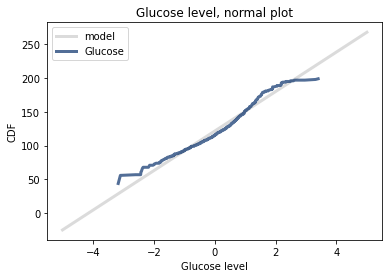

In [501]:
#Here is a normal probability plot with glucose levels, this shows that the data deviate from the model.

MakeNormalPlot(gluc)
thinkplot.Config(
    title="Glucose level, normal plot",
    xlabel="Glucose level",
    ylabel="CDF",
    loc="upper left",
)

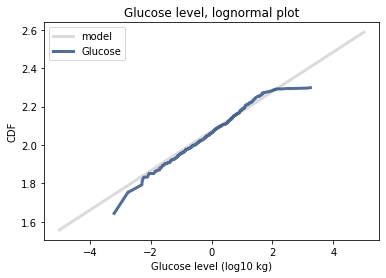

In [502]:
MakeNormalPlot(log_gluc)
thinkplot.Config(
    title="Glucose level, lognormal plot",
    xlabel="Glucose level (log10 kg)",
    ylabel="CDF",
    loc="upper left",
)

After plotting different analytical distributions for to determine which model bests fits this data, I think that the lognormal distribution best fits this data. Because this data is not economic, financial or business management, I did not create Pareto distributions. 

###### Creating scatter plots - exploring the relationship of Glucose to other variables by diabetes status

It is noted that Insulin has many zero values, about 50%. I included the scatter plot here as I am interested in seeing the relationship with glucose. Since there is so much missing data, I would not recommend replacing the zeros with another value (e.g., mean or median) and instead decided the most reasonable approach would be to exclude the zero values.

In [503]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [504]:
import matplotlib.pyplot as plt

In [505]:
# adding jitter in order to better visualize spread
age = Jitter(nozerogl.Age, 1.4)
glucose = Jitter(nozerogl.Glucose, 0.5)


# no zeros for missing for diabetes predigree function so this is variable can be used as it
dpf = Jitter(np.floor(nozerogl.DiabetesPedigreeFunction.astype(float)), 1.2)


# zeros in number of pregnancies is a value number and not a replacement for missing 
preg =  Jitter(np.floor(nozerogl.Pregnancies), 1.2)

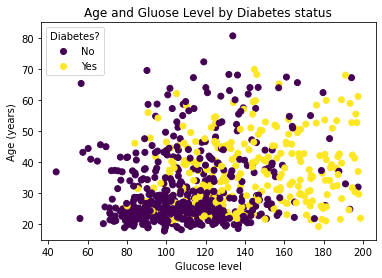

In [506]:
# diabetes data
status = nozerogl.Diabetes_YN


# color map for each category
db_names = ['No', 'Yes']

# plot                              
scatter = plt.scatter(glucose, age, c=nozerogl.Diabetes_YN.astype('category').cat.codes)
plt.ylim(15, 85) 
plt.xlabel("Glucose level")
plt.ylabel("Age (years)")
plt.title("Age and Gluose Level by Diabetes status")
plt.legend(handles=scatter.legend_elements()[0], labels=db_names, title="Diabetes?")
plt.show()

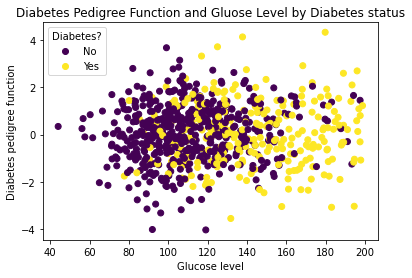

In [507]:
# diabetes data

status = nozerogl.Diabetes_YN

# color map for each category
db_names = ['No', 'Yes']

# plot                              
scatter = plt.scatter(glucose, dpf, c=nozerogl.Diabetes_YN.astype('category').cat.codes)

plt.xlabel("Glucose level")
plt.ylabel("Diabetes pedigree function")
plt.title("Diabetes Pedigree Function and Gluose Level by Diabetes status")
plt.legend(handles=scatter.legend_elements()[0], labels=db_names, title="Diabetes?")
plt.show()

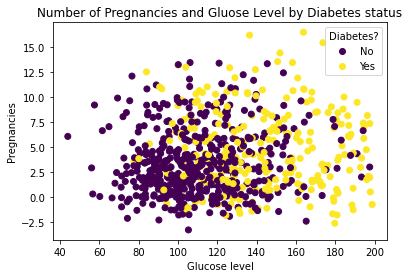

In [508]:
# diabetes data
status = nozerogl.Diabetes_YN


# color map for each category
db_names = ['No', 'Yes']

# plot                              
scatter = plt.scatter(glucose, preg, c=nozerogl.Diabetes_YN.astype('category').cat.codes)

plt.xlabel("Glucose level")
plt.ylabel("Pregnancies")
plt.title("Number of Pregnancies and Gluose Level by Diabetes status")
plt.legend(handles=scatter.legend_elements()[0], labels=db_names, title="Diabetes?")
plt.show()

In [509]:
#### removing zeros for bmi x glucose
nozerobmi2 = nozerobmi[nozerobmi.Glucose != 0]
#print(nozerobmi2)

#print(nozerobmi2.describe())

glucose = Jitter(nozerobmi2.Glucose, 0.5)
BMI = np.floor(nozerobmi2.BMI)

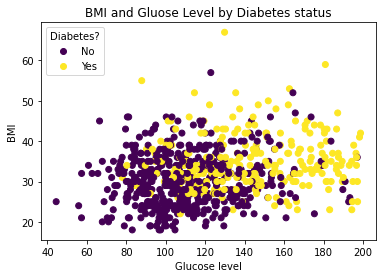

In [510]:
# diabetes data
status = nozerobmi2.Diabetes_YN


# color map for each category
db_names = ['No', 'Yes']

# plot                              
scatter = plt.scatter(glucose, BMI, c=nozerobmi2.Diabetes_YN.astype('category').cat.codes)

plt.xlabel("Glucose level")
plt.ylabel("BMI")
plt.title("BMI and Gluose Level by Diabetes status")
plt.legend(handles=scatter.legend_elements()[0], labels=db_names, title="Diabetes?")
plt.show()

In [511]:
#### removing zeros for skin thickness x glucose
nozerosk2 = nozerosk[nozerosk.Glucose != 0]

glucose = Jitter(nozerosk2.Glucose, 0.5)
skin= np.floor(nozerosk2.SkinThickness)

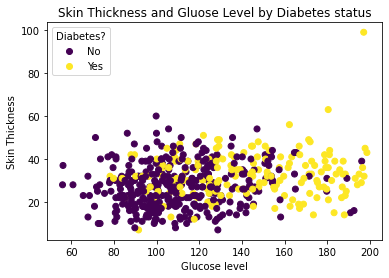

In [512]:
# diabetes data
status = nozerosk2.Diabetes_YN


# color map for each category
db_names = ['No', 'Yes']

# plot                              
scatter = plt.scatter(glucose, skin, c=nozerosk2.Diabetes_YN.astype('category').cat.codes)

plt.xlabel("Glucose level")
plt.ylabel("Skin Thickness")
plt.title("Skin Thickness and Gluose Level by Diabetes status")
plt.legend(handles=scatter.legend_elements()[0], labels=db_names, title="Diabetes?")
plt.show()

In [513]:
#### removing zeros for blood pressure x glucose
nozerobp2 = nozerobp[nozerobp.Glucose != 0]

glucose = Jitter(nozerobp2.Glucose, 0.5)
bp = np.floor(nozerobp2.BloodPressure)

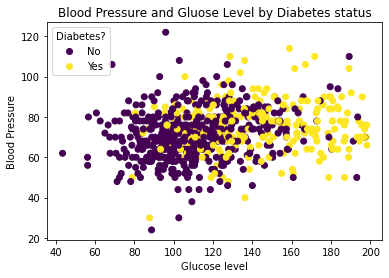

In [514]:
# diabetes data
status = nozerobp2.Diabetes_YN


# color map for each category
db_names = ['No', 'Yes']

# plot                              
scatter = plt.scatter(glucose, bp, c=nozerobp2.Diabetes_YN.astype('category').cat.codes)

plt.xlabel("Glucose level")
plt.ylabel("Blood Pressure")
plt.title("Blood Pressure and Gluose Level by Diabetes status")
plt.legend(handles=scatter.legend_elements()[0], labels=db_names, title="Diabetes?")
plt.show()

In [515]:
#### removing zeros for blood pressure x glucose
nozeroin2 = nozeroin[nozeroin.Glucose != 0]


glucose = Jitter(nozeroin2.Glucose, 0.5)
insulin = np.floor(nozeroin2.Insulin.astype(float))

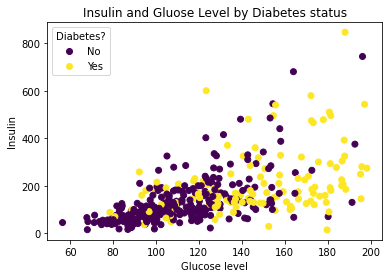

In [516]:
# diabetes data
status = nozeroin2.Diabetes_YN


# color map for each category
db_names = ['No', 'Yes']

# plot                              
scatter = plt.scatter(glucose, insulin, c=nozeroin2.Diabetes_YN.astype('category').cat.codes)

plt.xlabel("Glucose level")
plt.ylabel("Insulin")
plt.title("Insulin and Gluose Level by Diabetes status")
plt.legend(handles=scatter.legend_elements()[0], labels=db_names, title="Diabetes?")
plt.show()

For the scatter plots - I wanted to see how glucose level and diabetes status impacts the other continuous variables. From these plots, I believe that there is a stronger relationship between age and glucose however, for the other variables, I am guessing there is lower correlation values. 

After inspecting the histograms that I produce, the only variable that has a normal distribution is blood pressure. All other variables are skewed, with varying degrees of to the left. I am thinking that it makes more sense to use Spearman's correlation however I will test covariance, Pearson and Spearman in this section.

##### Correlation analysis 

In [517]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [518]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [519]:
# testing age and glucose
# The positive covariance between these two variables indicates that these variables tend to be higher or lower at the 
#  same time and the data points will tend to slope upwards

age, gluc = nozerogl.Age, nozerogl.Glucose
Cov(age, gluc)

95.90149423964517

In [520]:
# Pearsons
np.corrcoef(age, gluc)

array([[1.        , 0.26713555],
       [0.26713555, 1.        ]])

In [521]:
# Spearmans
SpearmanCorr(age, gluc)

0.283314566841515

In [522]:
# glucose with diabetes pedigree function 
dpf, gluc = nozerogl.DiabetesPedigreeFunction.astype(float), nozerogl.Glucose
Cov(dpf, gluc)

1.3893971406928234

In [523]:
# Pearsons
np.corrcoef(dpf, gluc)

array([[1.        , 0.13724574],
       [0.13724574, 1.        ]])

In [524]:
# Spearmans
SpearmanCorr(dpf, gluc)


0.09059621802621873

In [525]:
# glucose with pregnancies 
preg, gluc = nozerogl.Pregnancies, nozerogl.Glucose
Cov(preg, gluc)

13.186899336790518

In [526]:
# Pearsons
np.corrcoef(preg, gluc)

array([[1.        , 0.12813455],
       [0.12813455, 1.        ]])

In [527]:
# Spearmans
SpearmanCorr(preg, gluc)

0.1295473628131016

In [528]:
# glucose with BMI
bmi, gluc = nozerobmi2.BMI.astype(float), nozerobmi2.Glucose
Cov(bmi, gluc)

49.289501046853786

In [529]:
# Pearsons
np.corrcoef(bmi, gluc)

array([[1.        , 0.23277051],
       [0.23277051, 1.        ]])

In [530]:
# Spearmans
SpearmanCorr(bmi, gluc)

0.22776066432955258

In [531]:
# glucose with Skin Thickness
skin, gluc = nozerosk2.SkinThickness.astype(float), nozerosk2.Glucose
Cov(skin, gluc)

73.88764201381154

In [532]:
# Pearsons
np.corrcoef(skin, gluc)

array([[1.        , 0.22804323],
       [0.22804323, 1.        ]])

In [533]:
# Spearmans
SpearmanCorr(skin, gluc)

0.22981484241944017

In [534]:
# glucose with Blood Pressure 
bp, gluc = nozerobp2.BloodPressure.astype(float), nozerobp2.Glucose
Cov(bp, gluc)

84.69548514672141

In [535]:
# Pearsons
np.corrcoef(bp, gluc)

array([[1.        , 0.22319178],
       [0.22319178, 1.        ]])

In [536]:
# Spearmans
SpearmanCorr(bp, gluc)

0.249415019508688

In [537]:
# glucose with insulin
insulin, gluc = nozeroin2.Insulin.astype(float), nozeroin2.Glucose
Cov(insulin, gluc)

2121.6023153273895

In [538]:
# Pearsons
np.corrcoef(insulin, gluc)

array([[1.        , 0.58118621],
       [0.58118621, 1.        ]])

In [539]:
# Spearmans
SpearmanCorr(insulin, gluc)

0.6588133060957279

#### Correlation interpretation
All analyses are presented with covariance, Pearson r as well as Spearman's correlation coefficient. Because of skew (tending toward the left of any given distribution) - across all variables, Spearman's correlation coeffient is the focus for interpretation. 

For these analyses, when correlating Glucose with Age, Number of Pregnancies, Skin Thickness, Blood Pressure and BMI - lower positive correlations were found. 

The highest degree of relationship between two variables is found for Glucose and Insulin (r = .66) where a high positive correlation value was found. 

##### Hypothesis testing 

For this section - because I am interesting in determine which variables are good predictors of having diabetes or not - I decided to look at if there is a statistically significant difference between the means values of glucose levels for those who have diabetes or not. Thus the null hypothesis is that there are no differences betweeen the two groups. 

One way to model the null hypothesis that there are no differences between glucose levels for those who are diabetic and those who are not is to test the difference in means by permutation so taking values for diabetics and those who are not diabetic and shuffling them, treating the two groups as one big group. When running this, the p-value is 0 which means that after 1000 attempts, the simulation never yields an effect as big as the observed difference thus with a p < .0001, the conclusion would be that glucose is statistically significant between diabetics and non-diabetics.

In [540]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        #print(test_stat)
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [541]:
nodiabetes = nozerogl[nozerogl.Diabetes_YN == 0 ]
yesdiabetes = nozerogl[nozerogl.Diabetes_YN == 1]


In [542]:
data = nodiabetes.Glucose.values, yesdiabetes.Glucose.values

In [543]:
print(type(data))

<class 'tuple'>


In [544]:
print(nodiabetes.describe())

       SUBJID  Pregnancies  Glucose  BloodPressure  SkinThickness     BMI  \
count 497.000      497.000  497.000        497.000        497.000 497.000   
mean  392.988        3.312  110.644         68.213         19.632  30.317   
std   218.251        3.021   24.777         18.093         14.919   7.708   
min     2.000        0.000   44.000          0.000          0.000   0.000   
25%   202.000        1.000   93.000         62.000          0.000  25.400   
50%   408.000        2.000  107.000         70.000         21.000  30.100   
75%   574.000        5.000  125.000         78.000         31.000  35.300   
max   768.000       13.000  197.000        122.000         60.000  57.300   

       DiabetesPedigreeFunction     Age  Diabetes_YN  
count                   497.000 497.000      497.000  
mean                      0.431  31.247        0.000  
std                       0.300  11.679        0.000  
min                       0.078  21.000        0.000  
25%                       0.230

In [545]:
print(yesdiabetes.describe())

       SUBJID  Pregnancies  Glucose  BloodPressure  SkinThickness     BMI  \
count 266.000      266.000  266.000        266.000        266.000 266.000   
mean  370.398        4.861  142.320         70.801         22.056  35.106   
std   228.870        3.755   29.599         21.565         17.698   7.277   
min     1.000        0.000   78.000          0.000          0.000   0.000   
25%   188.250        1.250  119.000         66.000          0.000  30.800   
50%   348.000        4.000  140.000         74.000         27.000  34.200   
75%   584.000        8.000  167.000         82.000         35.750  38.500   
max   767.000       17.000  199.000        114.000         99.000  67.100   

       DiabetesPedigreeFunction     Age  Diabetes_YN  
count                   266.000 266.000      266.000  
mean                      0.551  37.053        1.000  
std                       0.373  11.007        0.000  
min                       0.088  21.000        1.000  
25%                       0.262

In [546]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

##### Conducting regression analysis 

Because I am interested in knowing what factors can predict being diabetic, and I have Diabetes_YN coded as 1,0 as my dependent variable, I will use logistic regression to build a model 

In [547]:
import statsmodels.formula.api as smf

In [548]:
model = smf.logit('Diabetes_YN ~ Glucose', data=nozerogl)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.515439
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Diabetes_YN   No. Observations:                  763
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            1
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                  0.2028
Time:                        16:26:05   Log-Likelihood:                -393.28
converged:                       True   LL-Null:                       -493.35
Covariance Type:            nonrobust   LLR p-value:                 1.949e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7151      0.438    -13.045      0.000      -6.574      -4.856
Glucose        0.0406      0.003     12.014      0.000       0.034       0.047
==============================================================================
"""

In [549]:
# extracting the exogenous and endogenous variables as the book mentions

endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [550]:
# The baseline prediction strategy is to guess that the subject has diabetes (Diabetes_YN = 1)
# This is right 35% of the time.
actual = endog['Diabetes_YN']
baseline = actual.mean()
baseline

0.3486238532110092

In [551]:
# using the model above - this step computes the number of predictions that are right

predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(132.0, 437.0)

In [552]:
# And then to compute the accuracy which is quite a bit higher than the baseline prediction

acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.745740498034076

In [553]:
# adding additional variables to see if they help explain more variance 

model = smf.logit('Diabetes_YN ~ Glucose + Pregnancies + BMI + SkinThickness + Insulin.astype(float) + BloodPressure', data=diab)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.479719
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Diabetes_YN   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                  0.2583
Time:                        16:26:08   Log-Likelihood:                -368.42
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.565e-52
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -7.8116      0.675    -11.572      0.000      -9.135      -6.489
Glucose                   0.0364      0.004     10.082      0.000       0.029       0.044
Pregnancies               0.1452      0.028      5.228      0.000       0.091       0.200
BMI                       0.0897      0.015      5.984      0.000       0.060       0.119
SkinThickness             0.0014      0.007      0.205      0.838      -0.012       0.015
Insulin.astype(float)    -0.0011      0.001     -1.207      0.227      -0.003       0.001
BloodPressure            -0.0120      0.005     -2.341      0.019      -0.022      -0.002
=========================================================================================
"""

In [554]:
# extracting the exogenous and endogenous variables as the book mentions

endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [555]:
actual =nendog['Diabetes_YN']
baseline = actual.mean()
baseline

0.3489583333333333

In [556]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(153.0, 435.0)

In [557]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.765625

The additional variables do help to have higher accuracy for predicting whether or not a subject has diabetes from this analysis. They add a modest amount of improvement. However, Glucose level seems to have the most effect in determining whether or not a subject will have diabetes.

###### Conclusions for this project 

For this project, I was interested in determining what variables could help predict if a person would get diabetes or not. The results of my exploratory data analysis showed that Glucose level is a strong predicter of diabetes - more so than any other variable. This conclusion is supported by the logistic regression model I ran as well as by scatter plots, histograms when split by diabetes status and CDF distributions. However, my analyses were not exhaustive and limited to the analyses that were conduted here for this assignment. Many different analyses seemed to point to Glucose being important, however, I also have read that Glucose is a key measure for diabetes and framed many of my analyses from that point of view. 

In terms of what could have been improved upon or what was missing - a big concern of mine with this data was a lack of documentation. From the kaggle.com site, there was a brief description of the dataset and I spent about 2 days on the National Institute of Diabetes and Digestive and Kidney Diseases trying to locate the original source with no luck. However, I did come across more detail on this data from other data science posts (which is how I came to know I picked a dataset that many others have used to practice analyses on). Without proper documentation, I had to make guesses on the best analysis decision when it came to many zero values in variables like Insulin. I determined that 0 had been used for missing values and excluded these records. Was this the right choice? It is hard to say - when I looked at the histogram, it appeared to not align with the rest of the data. Also, the lack of documentation made it challenging in terms of what the units for each measurement was. 

For variables that could have helped the analysis, it would have been great to have the full dataset. It is not known if there is a higher rate of diabetes in this population (Pima Indians females located in Arizona) than the rest of the United States or if there is something different about diet, about lifestyle that could drive the findings. I would have liked to be able to have the fuller population however, I did want to have a dataset that where I could better understand changes and updates as I increase my Python skill set. 

The assumptions that I made for this analysis was that my dataset was an actual subset from a larger dataset, that Glucose was a strong predictor of diabetes and that 0 was used to represent missing data. Perhaps I am incorrect about my assumption with zero (and what if I was wrong for Insulin? It would mean that my analysis for that variable was truncated). 

The challenges that I faced was in understanding some aspects of distribution (which is the best one) and then understanding some of the results from the hypothesis testing and regression analyses. At times, I wished I had used other methods to perform these statistics so that I could better search aspects of the output when some aspect of the output was not clear. That said, with each class - the concepts are getting more and more clear. Another challenge I faced was with Python, the language is so flexible but takes awhile for me to understand how the analyses always work, how variable become arrays as input for analyses. It takes me longer to understand though in other ways, it simplifies how the actual statistics are being derived. 